In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
# Function to generate dataset
def generate_dataset(num_samples, img_size=50):
    X = np.zeros((num_samples, img_size, img_size, 1), dtype=np.float32)
    y = np.zeros((num_samples, 2), dtype=np.float32)
    
    for i in range(num_samples):
        x_coord = np.random.randint(0, img_size)
        y_coord = np.random.randint(0, img_size)
        X[i, x_coord, y_coord, 0] = 255.0
        y[i] = [x_coord, y_coord]
    
    return X, y

In [3]:
# Generating dataset
num_samples = 10000
X, y = generate_dataset(num_samples)


In [4]:
# Splitting dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2)  
])

model.compile(optimizer=Adam(), loss='mse')

In [5]:
# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20

250/250 [==============================] - 156s 613ms/step - loss: 36.4750 - val_loss: 2.7487
Epoch 2/20
250/250 [==============================] - 141s 562ms/step - loss: 1.7890 - val_loss: 1.5845
Epoch 3/20
250/250 [==============================] - 147s 590ms/step - loss: 1.2381 - val_loss: 1.1887
Epoch 4/20
250/250 [==============================] - 156s 626ms/step - loss: 0.9243 - val_loss: 0.8799
Epoch 5/20
250/250 [==============================] - 158s 633ms/step - loss: 1.0019 - val_loss: 1.0378
Epoch 6/20
250/250 [==============================] - 148s 592ms/step - loss: 1.0755 - val_loss: 0.8200
Epoch 7/20
250/250 [==============================] - 153s 611ms/step - loss: 0.6412 - val_loss: 0.7824
Epoch 8/20
250/250 [==============================] - 149s 596ms/step - loss: 0.6183 - val_loss: 0.5947
Epoch 9/20
250/250 [==============================] - 149s 598ms/step - loss: 0.8199 - val_loss: 0.8414
Epoch 10/20
250/250 [==============================] - 150s 60

In [7]:
# Evaluating the model
def plot_history(history):
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def visualize_predictions(model, X, y, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        idx = np.random.randint(0, X.shape[0])
        img = X[idx].reshape(50, 50)
        true_coords = y[idx]
        pred_coords = model.predict(X[idx].reshape(1, 50, 50, 1))[0]


        plt.subplot(num_samples, 2, 2*i + 1)
        plt.imshow(img, cmap='gray')
        plt.scatter(true_coords[1], true_coords[0], color='red', label='True', s=50)
        plt.legend()
        
        plt.subplot(num_samples, 2, 2*i + 2)
        plt.imshow(img, cmap='gray')
        plt.scatter(pred_coords[1], pred_coords[0], color='blue', label='Predicted', s=50)
        plt.legend()
    plt.show()

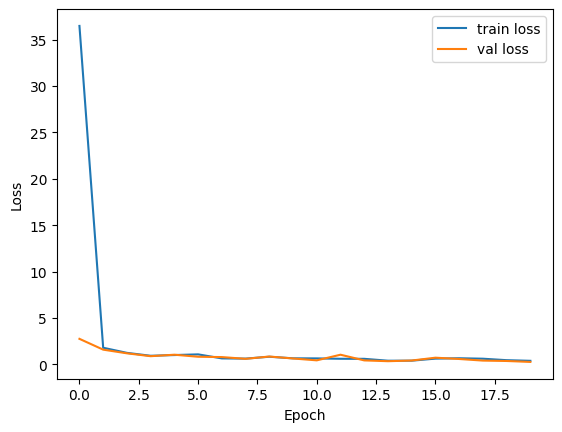

1/1 [==============================] - 0s 39ms/step


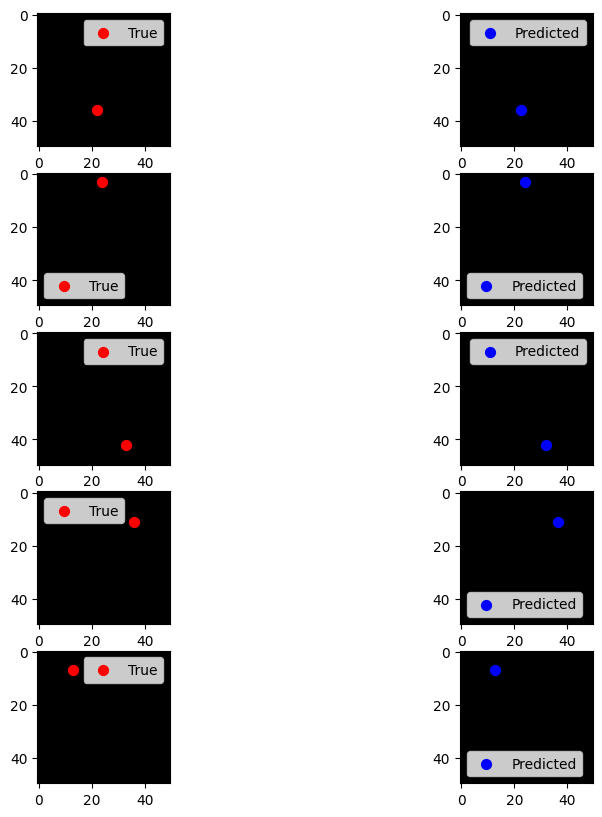

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
plot_history(history)
visualize_predictions(model, X_val, y_val)

model.save('pixel_coordinate_predictor.h5')